## EXPLORATORY DATA ANALYSIS OF PLASTIC WASTE GENERATED AROUND THE WORLD

In [319]:
# Importing necessary libraries/packages : : 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [320]:
# DATA EXTRACTION AND EXPLORATION
d=pd.read_csv("Plastic Waste Around the World.csv")

In [321]:
# Displaying First 5 rows : 
d.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [322]:
#Number of rows and columns : 
rc=d.shape
print("Number of rows in the dataset :",rc[0],"and number of columns :",rc[1])

Number of rows in the dataset : 165 and number of columns : 6


In [323]:
# Datatypes of the attributes : 
d.dtypes

Country                    object
Total_Plastic_Waste_MT    float64
Main_Sources               object
Recycling_Rate            float64
Per_Capita_Waste_KG       float64
Coastal_Waste_Risk         object
dtype: object

In [324]:
#Summary of the data  :
d.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


## Data (attribute) analysis

In [325]:
d['Main_Sources'].value_counts()   # Count of each source of plastic

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Automotive_Packaging       1
Packaging_Electronics      1
Consumer_Goods             1
Electronics_Packaging      1
Name: count, dtype: int64

In [326]:
d['Coastal_Waste_Risk'].value_counts()   # To check number of nations with different threat/risk levels

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [327]:
# Statistical analysis of each numeric attribute : 

l=['Total_Plastic_Waste_MT','Recycling_Rate','Per_Capita_Waste_KG']

for i in l:
    print("Analysis for",i," : ")
    print("Max value :",d[i].max())
    print("Min value :",d[i].min())
    print("Mean :",round(d[i].mean(),2))
    print("Median :",d[i].median())
    print("Mode :",d[i].mode()[0])
    print("Standard deviation :",round(d[i].std(),2))
    print()



Analysis for Total_Plastic_Waste_MT  : 
Max value : 59.08
Min value : 0.01
Mean : 1.72
Median : 0.51
Mode : 0.01
Standard deviation : 6.0

Analysis for Recycling_Rate  : 
Max value : 84.8
Min value : 0.1
Mean : 13.1
Median : 5.4
Mode : 0.4
Standard deviation : 16.69

Analysis for Per_Capita_Waste_KG  : 
Max value : 1564.4
Min value : 2.6
Mean : 122.26
Median : 54.9
Mode : 5.3
Standard deviation : 222.85



## Handling Missing Values : Finding and removing missing values(if any).

In [328]:
d.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

## Visualisation : Univariate and Multi-Variate analysis

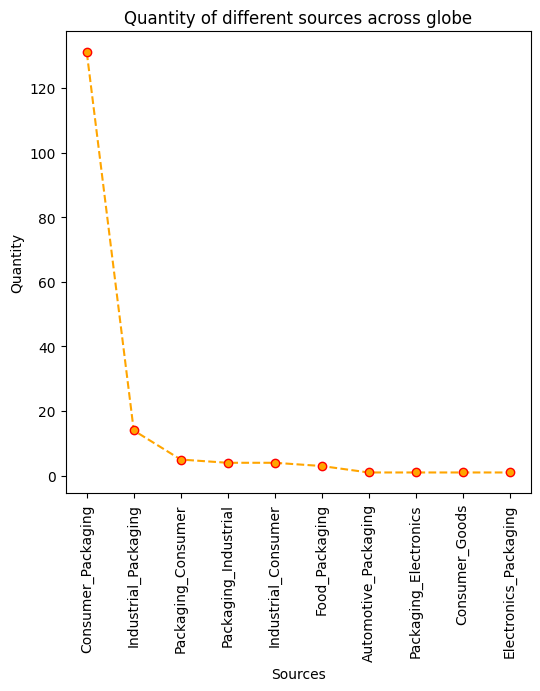

In [329]:
#LINE PLOT : :

plt.figure(figsize=(6,6))
plt.plot(d['Main_Sources'].value_counts(),color='orange',linestyle='dashed',
         marker='o',markeredgecolor='red')
plt.title("Quantity of different sources across globe")
plt.xlabel("Sources")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

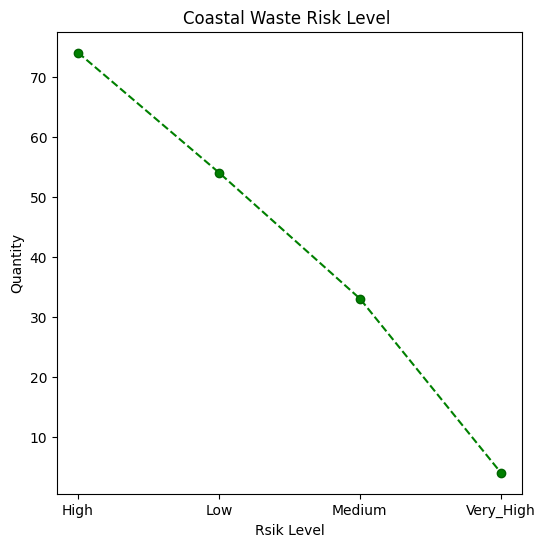

In [330]:
plt.figure(figsize=(6,6))
plt.plot(d['Coastal_Waste_Risk'].value_counts(),color='green',linestyle='dashed',
         marker='o',markeredgecolor='darkgreen')
plt.title("Coastal Waste Risk Level ")
plt.xlabel("Rsik Level")
plt.ylabel("Quantity")
plt.show()

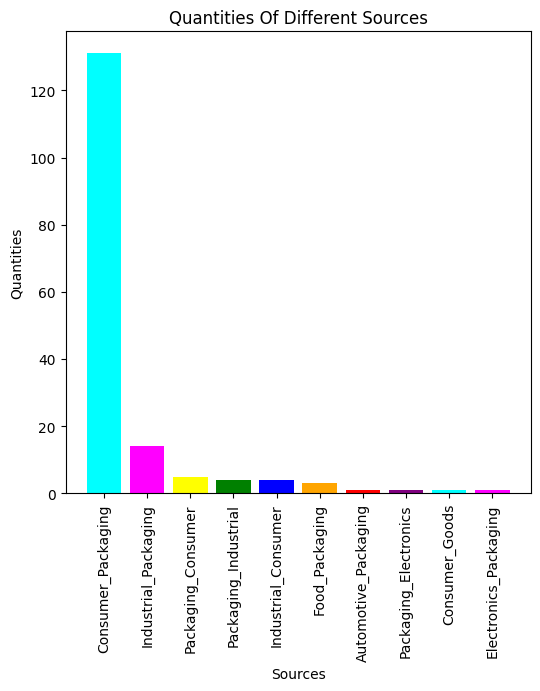

In [331]:
# BAR PLOT : Representing quantities of different sources using bar plot

categories = d['Main_Sources'].value_counts().index  
values = d['Main_Sources'].value_counts().values     
plt.figure(figsize=(6, 6))
colors = ['cyan', 'magenta', 'yellow', 'green', 'blue', 'orange', 'red', 'purple']
plt.bar(categories, values, color=colors)
plt.title("Quantities Of Different Sources")
plt.xlabel("Sources")
plt.ylabel("Quantities")
plt.xticks(rotation=90)
plt.show()

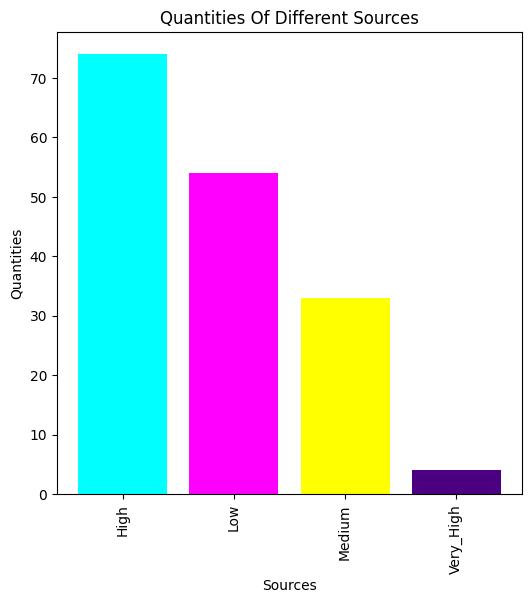

In [332]:
categories = d['Coastal_Waste_Risk'].value_counts().index  
values = d['Coastal_Waste_Risk'].value_counts().values     
plt.figure(figsize=(6, 6))
colors = ['Cyan','Fuchsia','yellow','indigo']
plt.bar(categories, values, color=colors)
plt.title("Quantities Of Different Sources")
plt.xlabel("Sources")
plt.ylabel("Quantities")
plt.xticks(rotation=90)
plt.show()

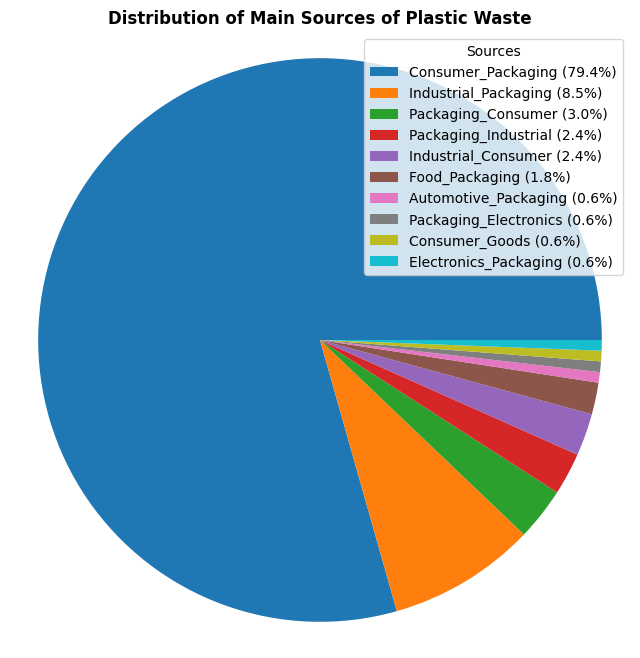

In [333]:
# PIE CHART : 

main_sources = d['Main_Sources'].value_counts()
percentages = round(main_sources / main_sources.sum() * 100,2)
legend_labels = [f'{source} ({pct:.1f}%)' for source, pct in zip(main_sources.index, percentages)]
plt.figure(figsize=(8, 8))
plt.pie(main_sources,  startangle=0)
plt.title('Distribution of Main Sources of Plastic Waste',fontweight='bold')
plt.legend(legend_labels, title="Sources", loc="upper right")
plt.axis('equal')  
plt.show()


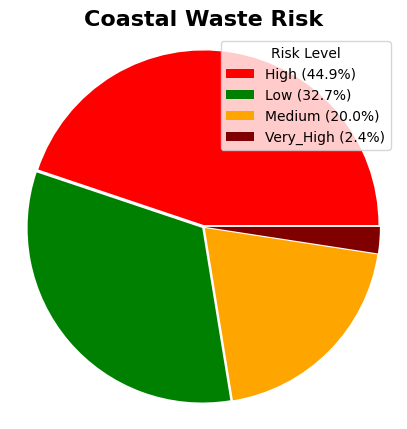

In [334]:
main_sources = d['Coastal_Waste_Risk'].value_counts()
percentages = round(main_sources / main_sources.sum() * 100,2)
legend_labels = [f'{source} ({pct:.1f}%)' for source, pct in zip(main_sources.index, percentages)]
plt.figure(figsize=(5,5))
colors=['red', 'green', 'orange','maroon']
explode = [0.01] * len(main_sources) 
plt.pie(main_sources,  startangle=0, colors=colors, explode=explode, shadow=False, autopct=None)
plt.title('Coastal Waste Risk',fontsize=16, fontweight='bold')
plt.legend(legend_labels, title="Risk Level", loc="upper right")
plt.axis('equal')  
plt.show()


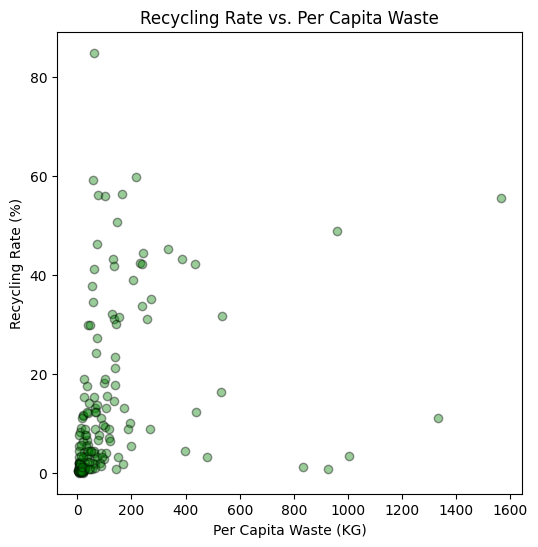

In [335]:
# Scatter Plot : 
plt.figure(figsize=(6,6))
plt.scatter(d['Per_Capita_Waste_KG'], d['Recycling_Rate'], color='green', alpha=0.4,edgecolor='black')
plt.title('Recycling Rate vs. Per Capita Waste')
plt.xlabel('Per Capita Waste (KG)')
plt.ylabel('Recycling Rate (%)')
plt.grid(False)
plt.show()

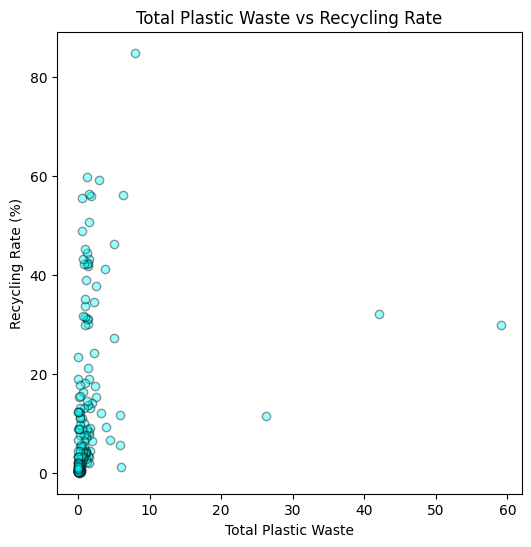

In [336]:
# Scatter Plot : 
plt.figure(figsize=(6,6))
plt.scatter( d['Total_Plastic_Waste_MT'],d['Recycling_Rate'], color='cyan', alpha=0.4,edgecolor='black')
plt.title('Total Plastic Waste vs Recycling Rate')
plt.xlabel('Total Plastic Waste')
plt.ylabel('Recycling Rate (%)')
plt.grid(False)
plt.show() 

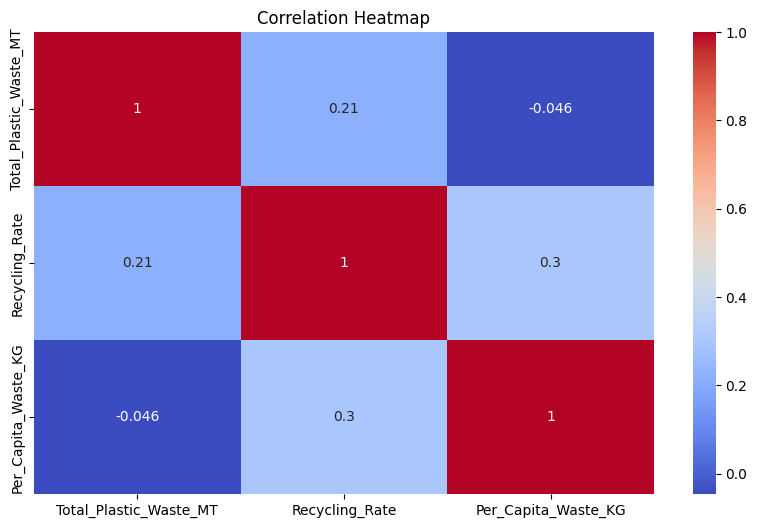

In [337]:
plt.figure(figsize=(10, 6))
correlation_matrix = d[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']].corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## OUTLIERS DETECTION

<Axes: >

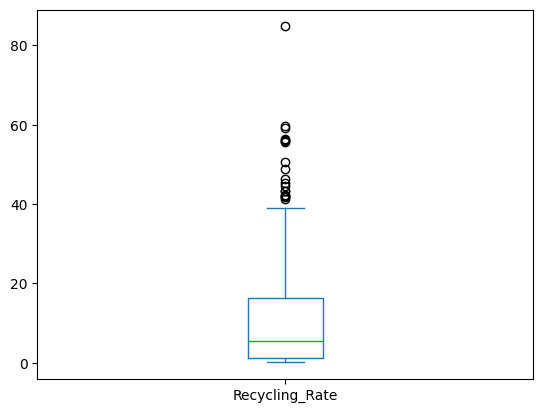

In [338]:
d['Recycling_Rate'].plot.box()

<Axes: >

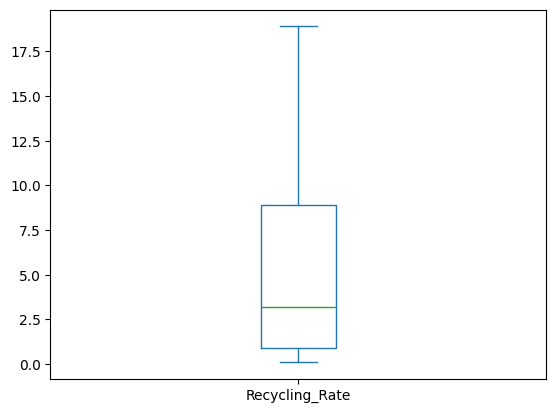

In [339]:
while True:
    Q1 = d['Recycling_Rate'].quantile(0.25)
    Q3 = d['Recycling_Rate'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    previous_length = d.shape[0]

    d = d[(d['Recycling_Rate'] >= lower_bound) & (d['Recycling_Rate'] <= upper_bound)]

    if d.shape[0] == previous_length:
        break
d = d[(d['Recycling_Rate'] >= lower_bound) & (d['Recycling_Rate'] <= upper_bound)]
d['Recycling_Rate'].plot.box()

<Axes: >

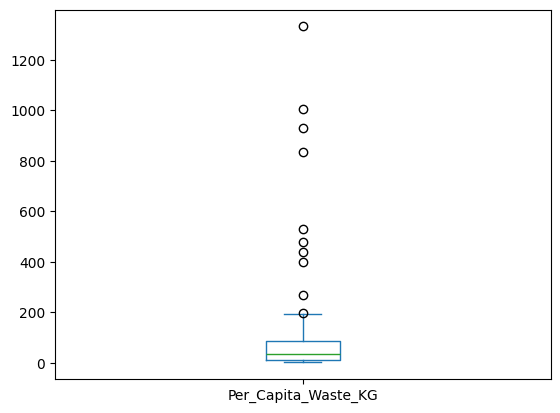

In [340]:
d['Per_Capita_Waste_KG'].plot.box()

<Axes: >

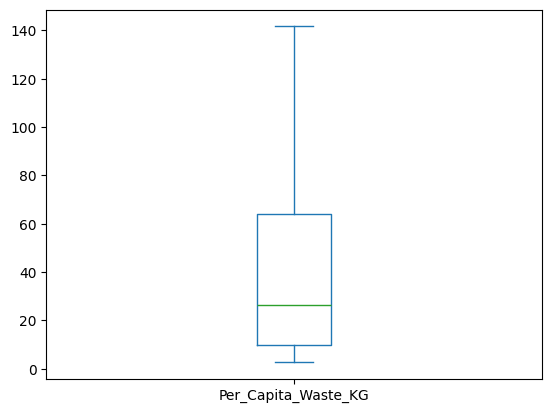

In [341]:
while True:
    Q1 = d['Per_Capita_Waste_KG'].quantile(0.25)
    Q3 = d['Per_Capita_Waste_KG'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    previous_length = d.shape[0]

    d = d[(d['Per_Capita_Waste_KG'] >= lower_bound) & (d['Per_Capita_Waste_KG'] <= upper_bound)]

    if d.shape[0] == previous_length:
        break
d = d[(d['Per_Capita_Waste_KG'] >= lower_bound) & (d['Per_Capita_Waste_KG'] <= upper_bound)]
d['Per_Capita_Waste_KG'].plot.box()

<Axes: >

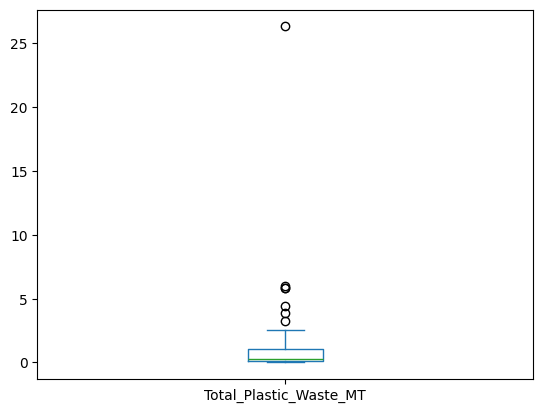

In [342]:
d['Total_Plastic_Waste_MT'].plot.box()

<Axes: >

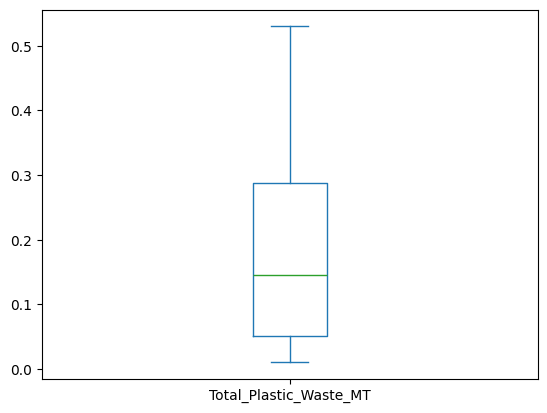

In [343]:
while True:
    Q1 = d['Total_Plastic_Waste_MT'].quantile(0.25)
    Q3 = d['Total_Plastic_Waste_MT'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    previous_length = d.shape[0]

    d = d[(d['Total_Plastic_Waste_MT'] >= lower_bound) & (d['Total_Plastic_Waste_MT'] <= upper_bound)]

    if d.shape[0] == previous_length:
        break
d = d[(d['Total_Plastic_Waste_MT'] >= lower_bound) & (d['Total_Plastic_Waste_MT'] <= upper_bound)]
d['Total_Plastic_Waste_MT'].plot.box()